# Sentiment in voice prediction model 

Use CNN to predict emotion of voice (see github for more info: https://github.com/marcogdepinto/Emotion-Classification-Ravdess) 


**License information**

“The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS)” by Livingstone & Russo is licensed under CC BY-NA-SC 4.0.

**File naming convention**

Each of the 7356 RAVDESS files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 02-01-06-01-02-01-12.mp4). These identifiers define the stimulus characteristics:

**Filename identifiers**

* Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
* Vocal channel (01 = speech, 02 = song).
* Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
* Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the ‘neutral’ emotion.
* Statement (01 = “Kids are talking by the door”, 02 = “Dogs are sitting by the door”).
* Repetition (01 = 1st repetition, 02 = 2nd repetition).
* Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).
 
**Filename example: 02-01-06-01-02-01-12.mp4**

* Video-only (02)
* Speech (01)
* Fearful (06)
* Normal intensity (01)
* Statement “dogs” (02)
* 1st Repetition (01)
* 12th Actor (12)
* Female, as the actor ID number is even.

**The baseline CNN built here comes from the GitHub repo listed above*

>[Sentiment in voice prediction model](#scrollTo=L6powZkq1yzi)

>>[Exploratory Data Analysis](#scrollTo=sr7gjH3V52T9)

>>[Obtain Librosa array & MFCSS](#scrollTo=o0MPWKBS7ZIa)

>>[Load Librosa & MFCSS data](#scrollTo=w9E-ou3F8wg_)

>>[Build Neural Net](#scrollTo=x4PVOl-S36iE)

>>[Plot Accuracy & Loss](#scrollTo=oyKT6cBgASzo)

>>[Predictions & Classification Report](#scrollTo=LolSeaa6BV4N)

>>[Save Model & Weights](#scrollTo=WrAR9moqBfkG)

>>[BEGIN HERE: Import trained model](#scrollTo=lp9AD5xb_wv-)

>>[Predictions](#scrollTo=M298ay4SBqLq)



In [1]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
#immports
import librosa
from librosa import display
import os
import pandas as pd
import glob 
import joblib
% pylab inline

#model imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

#install librosa 
!pip install librosa

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['display']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Exploratory Data Analysis

Visualize the wave plot of different sentiments and gender

 
neutral Actor 1


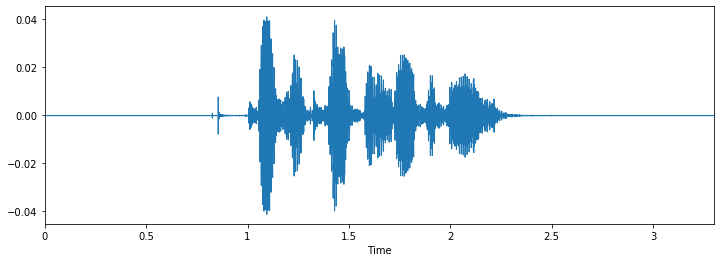

In [0]:
data, sampling_rate = librosa.load('/content/drive/My Drive/Ravdess/03-01-01-01-01-01-01.wav')
print(" ")
print('neutral, male Actor 1')
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

 
neutral Actor 2


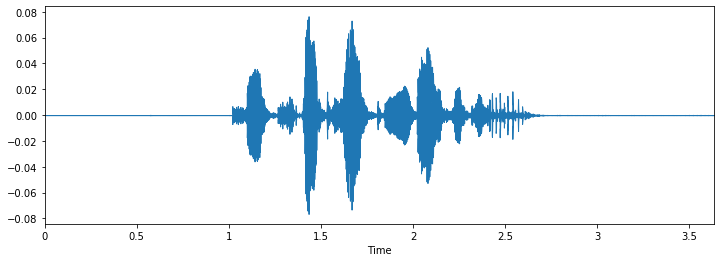

In [0]:
data, sampling_rate = librosa.load('/content/drive/My Drive/Ravdess/03-01-01-01-01-01-02.wav')
print(" ")
print('neutral, female Actor 2')
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

 
neutral Actor 3


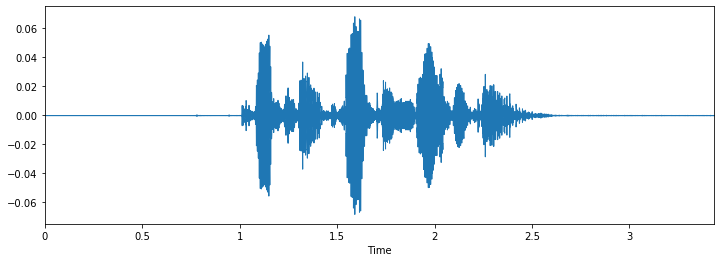

In [0]:
data, sampling_rate = librosa.load('/content/drive/My Drive/Ravdess/03-01-01-01-01-01-03.wav')
print(" ")
print('neutral, male Actor 3')
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

 
neutral Actor 4


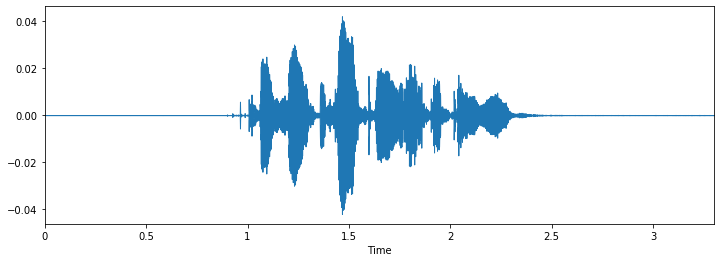

In [0]:
data, sampling_rate = librosa.load('/content/drive/My Drive/Ravdess/03-01-01-01-01-01-04.wav')
print(" ")
print('neutral, female Actor 4')
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

angry actor 1


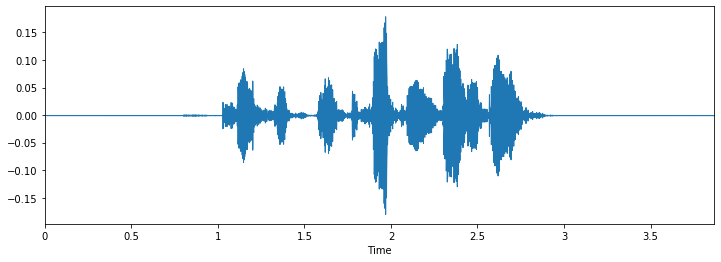

In [0]:
data, sampling_rate = librosa.load('/content/drive/My Drive/Ravdess/03-01-05-01-01-01-01.wav')
print('angry, male actor 1')
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

angry actor 2


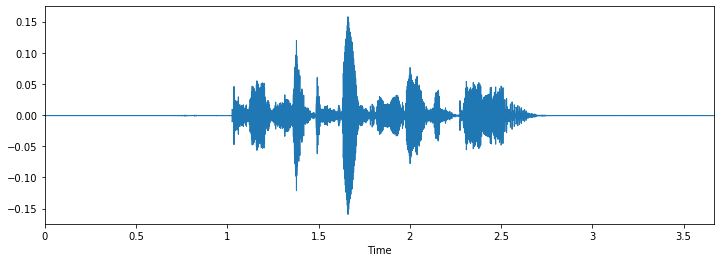

In [0]:
data, sampling_rate = librosa.load('/content/drive/My Drive/Ravdess/03-01-05-01-01-01-02.wav')
print('angry, female actor 2')
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

angry actor 3


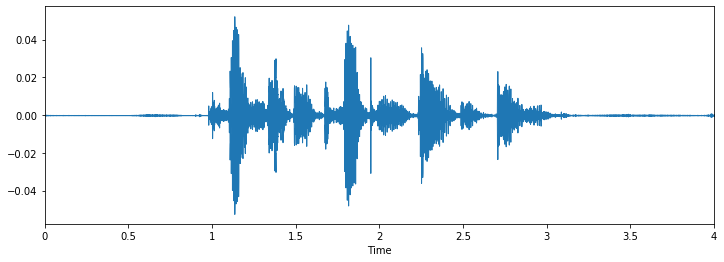

In [0]:
data, sampling_rate = librosa.load('/content/drive/My Drive/Ravdess/03-01-05-01-01-01-03.wav')
print('angry, male actor 3')
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

angry actor 4


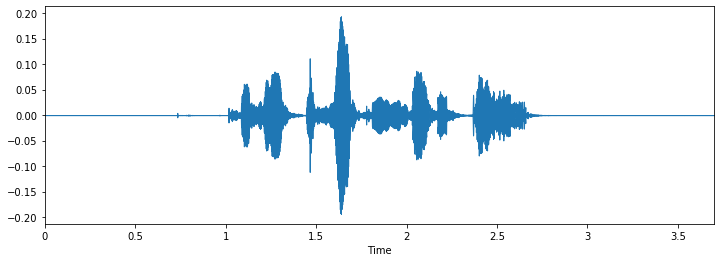

In [0]:
data, sampling_rate = librosa.load('/content/drive/My Drive/Ravdess/03-01-05-01-01-01-04.wav')
print('angry, female actor 4')
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

happy actor 1


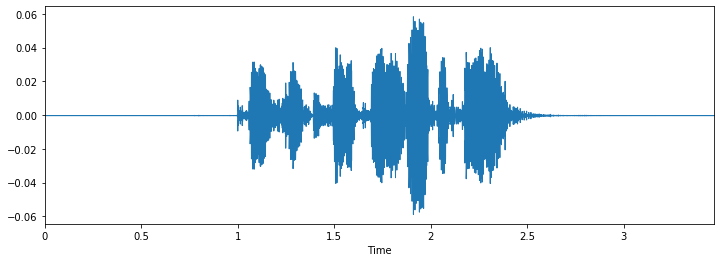

In [0]:
data, sampling_rate = librosa.load('/content/drive/My Drive/Ravdess/03-01-03-01-01-01-01.wav')
print('happy, male actor 1')
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

happy actor 2


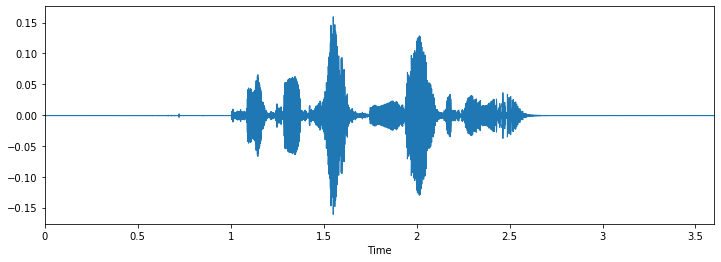

In [0]:
data, sampling_rate = librosa.load('/content/drive/My Drive/Ravdess/03-01-03-01-01-01-02.wav')
print('happy, female actor 2')
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

happy actor 3


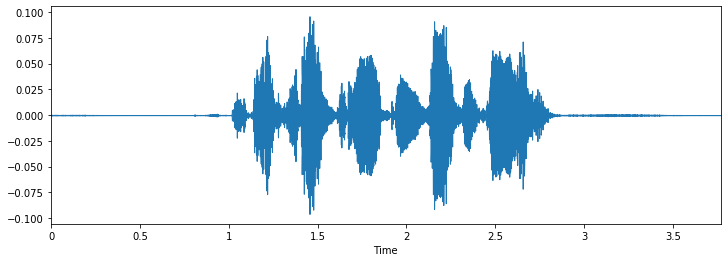

In [0]:
data, sampling_rate = librosa.load('/content/drive/My Drive/Ravdess/03-01-03-01-01-01-03.wav')
print('happy, female actor 3')
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

happy actor 4


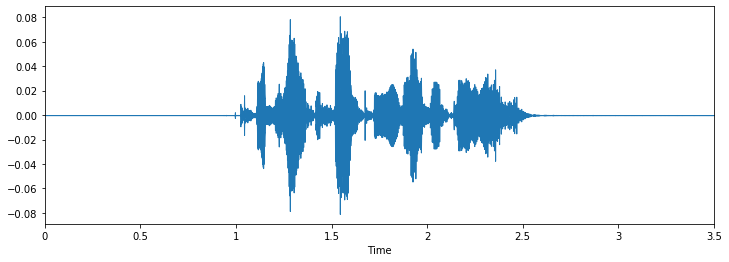

In [0]:
data, sampling_rate = librosa.load('/content/drive/My Drive/Ravdess/03-01-03-01-01-01-04.wav')
print('happy, female actor 4')
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

## Obtain Librosa array & MFCSS 
Save this data in joblib files for later use. This way, we do not need to retrain every time we want to use the data/model.

In [0]:
# import time

# path = '/content/drive/My Drive/Ravdess/'
# lst = []

# start_time = time.time()

# for subdir, dirs, files in os.walk(path):
#   for file in files:
#       try:
#         #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
#         X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
#         mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
#         # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
#         # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
#         file = int(file[7:8]) - 1 
#         arr = mfccs, file
#         lst.append(arr)
#       # If the file is not valid, skip it
#       except ValueError:
#         continue

# print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

--- Data loaded. Loading time: 1007.9660403728485 seconds ---


In [0]:
# # Creating X and y: zip makes a list of all the first elements, and a list of all the second elements.
# X,y = zip(*lst)

In [0]:
# import numpy as np 
# X=np.asarray(X)
# y=np.asarray(y)
# X.shape, y.shape

((1440, 40), (1440,))

In [0]:
#saving joblib files to not load them again with the loop above

# X_name = 'X.joblib'
# y_name = 'y.joblib'
# save_dir = '/content/drive/My Drive/Ravdess_model'

# savedX = joblib.dump(X, os.path.join(save_dir, X_name))
# savedy = joblib.dump(y, os.path.join(save_dir, y_name))

## Load Librosa & MFCSS data

In [0]:
#loading saved models 
X=joblib.load('/content/drive/My Drive/Ravdess_model/X.joblib')
y=joblib.load('/content/drive/My Drive/Ravdess_model/y.joblib')

## Build Neural Net

Get train/test data, need to expand dims for NN


In [0]:
#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [0]:
#expand dims
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [7]:
#check shape
x_traincnn.shape, x_testcnn.shape

((3315, 40, 1), (1633, 40, 1))

In [0]:
#build model 
model = Sequential()

model.add(Conv1D(128, 5,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00005, rho=0.9, epsilon=None, decay=0.0)

In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 40, 128)           768       
_________________________________________________________________
activation_13 (Activation)   (None, 40, 128)           0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 40, 128)           0         
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 5, 128)            0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 5, 128)            82048     
_________________________________________________________________
activation_14 (Activation)   (None, 5, 128)            0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 5, 128)           

In [0]:
#complie model 
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [0]:
#fit model 
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=1000, validation_data=(x_testcnn, y_test))

## Plot Accuracy & Loss

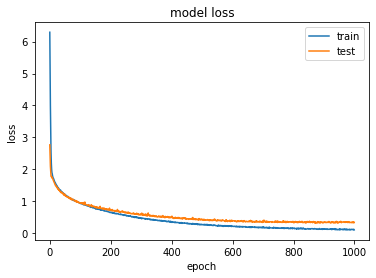

In [0]:
#plot loss
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

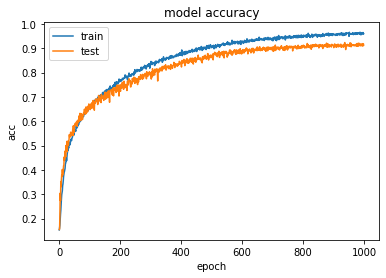

In [0]:
#plot accuracy 
plt.plot(cnnhistory.history['acc'])
plt.plot(cnnhistory.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Predictions & Classification Report

* Create a variable predictions that will contain the model.predict_classes outcome
* Convert our y_test (array of strings with our classes) to an array of int called new_Ytest, otherwise it will not be comparable to the predictions by the classification report.

In [0]:
#print predictions
predictions=model.predict_classes(x_testcnn)
predictions

array([1, 4, 3, ..., 1, 4, 0])

In [0]:
#need to convert y-test to int
y_test

array([1, 4, 3, ..., 1, 4, 0])

In [0]:
#convert y-test to int
new_Ytest=y_test.astype(int)
new_Ytest

array([1, 4, 3, ..., 1, 4, 0])

In [0]:
#now do classification report 
report = classification_report(new_Ytest, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       134
           1       0.99      0.91      0.95       251
           2       0.90      0.90      0.90       242
           3       0.84      0.90      0.87       271
           4       0.93      0.95      0.94       253
           5       0.91      0.92      0.91       239
           6       0.97      0.92      0.94       127
           7       0.85      0.90      0.87       116

    accuracy                           0.91      1633
   macro avg       0.92      0.91      0.91      1633
weighted avg       0.92      0.91      0.91      1633



## Save Model & Weights

In [0]:
# save model 
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = '/content/drive/My Drive/Ravdess_model'

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/drive/My Drive/Ravdess_model/Emotion_Voice_Detection_Model.h5 


## BEGIN HERE: Import trained model
After mounting drive, importing libraries, load librosa & MFCSS data, train/test split, and train/test cnn, can begin here directly.

In [8]:
#reload model to test it
loaded_model = keras.models.load_model('/content/drive/My Drive/Ravdess_model/Emotion_Voice_Detection_Model.h5')
loaded_model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.









Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 40, 128)           768       
_________________________________________________________________
activation_13 (Activation)   (None, 40, 128)           0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 40, 128)           0         
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 5, 128)            0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 5, 128)            82048     
____________________________

In [13]:
#check acc of model
loss, acc = loaded_model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

1633/1633 [==============================] - 3s 2ms/step
Restored model, accuracy: 91.30%


## Predictions 

In [0]:
#define functions for making predictions
class livePredictions:

    def __init__(self, path, file):

        self.path = path
        self.file = file

    def load_model(self):
        '''
        I am here to load you model.
        :param path: path to your h5 model.
        :return: summary of the model with the .summary() function.
        '''
        self.loaded_model = keras.models.load_model(self.path)
        return self.loaded_model.summary()

    def makepredictions(self):
        '''
        I am here to process the files and create your features.
        '''
        data, sampling_rate = librosa.load(self.file)
        mfccs = np.mean(librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=40).T, axis=0)
        x = np.expand_dims(mfccs, axis=2)
        x = np.expand_dims(x, axis=0)
        predictions = self.loaded_model.predict_classes(x)
        print( "Prediction is", " ", self.convertclasstoemotion(predictions))

    def convertclasstoemotion(self, pred):
        '''
        I am here to convert the predictions (int) into human readable strings.
        '''
        self.pred  = pred

        if pred == 0:
            pred = "neutral"
            return pred
        elif pred == 1:
            pred = "calm"
            return pred
        elif pred == 2:
            pred = "happy"
            return pred
        elif pred == 3:
            pred = "sad"
            return pred
        elif pred == 4:
            pred = "angry"
            return pred
        elif pred == 5:
            pred = "fearful"
            return pred
        elif pred == 6:
            pred = "disgust"
            return pred
        elif pred == 7:
            pred = "surprised"
            return pred

# Here you can replace path and file with the path of your model and of the file from the RAVDESS dataset you want to use for the prediction,
# Below, I have used a neutral file: the prediction made is neutral.


In [33]:
pred = livePredictions(path='/content/drive/My Drive/Ravdess_model/Emotion_Voice_Detection_Model.h5',
                       file='/content/drive/My Drive/Ravdess/03-01-05-01-01-01-24.wav')

pred.load_model()
pred.makepredictions()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 40, 128)           768       
_________________________________________________________________
activation_13 (Activation)   (None, 40, 128)           0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 40, 128)           0         
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 5, 128)            0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 5, 128)            82048     
_________________________________________________________________
activation_14 (Activation)   (None, 5, 128)            0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 5, 128)           

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.


Prediction is   angry


In [13]:
pred = livePredictions(path='/content/drive/My Drive/Ravdess_model/Emotion_Voice_Detection_Model.h5',
                       file='kat_angry.wav')

pred.load_model()
pred.makepredictions()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 40, 128)           768       
_________________________________________________________________
activation_13 (Activation)   (None, 40, 128)           0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 40, 128)           0         
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 5, 128)            0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 5, 128)            82048     
_________________________________________________________________
activation_14 (Activation)   (None, 5, 128)            0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 5, 128)           

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.


Prediction is   happy


# Speech to Text

A way to improve the predictions would be to take into account the words being spoken. Convert speech to text, then get sentiment of text.

1. Convert speech to text
2. Predict sentiment of text using gensim

In [0]:
#import library 
import speech_recognition as sr
from textblob import TextBlob

#install package
#! pip install SpeechRecognition 

In [0]:
#create recognizer class instace
r = sr.Recognizer()

In [42]:
#convert speech to text 
file_name = 'kat_angry.wav'
sound_file = sr.AudioFile('kat_angry.wav')
with sound_file as source:
  audio = r.record(source)

print(type(audio))
text = r.recognize_google(audio)
print(text)

<class 'speech_recognition.AudioData'>
dogs are sitting by the door


In [0]:
#find sentiment of translated text
def sentiment_score(text): 
  """function returns sentiment score of text
  0 - neutral, >0 - postive, <0 = negative"""
  obj = TextBlob(text) 
  sentiment = obj.sentiment.polarity
  return sentiment


In [49]:
sentiment_score(input_text)

0.45469696969696977